<a href="https://colab.research.google.com/github/Khushisahu05/ATG_TASK2_Scarpping/blob/main/banao1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone Yolov5

!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16567, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16567 (delta 23), reused 31 (delta 13), pack-reused 16522
Receiving objects: 100% (16567/16567), 15.07 MiB | 26.15 MiB/s, done.
Resolving deltas: 100% (11376/11376), done.
/content/yolov5


In [2]:
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # For Display images

print(f"Setup Complete. Using Torch {torch.__version__} ({torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'})")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.7 MB/s eta 0:00:0

In [3]:
from roboflow import Roboflow

# Replace 'YOUR_API_KEY' with your actual Roboflow API key as a string
api_key = 'czzc7DPlCPpU147WgbK1'
rf = Roboflow(model_format="yolov5", notebook="ultralytics", api_key=api_key)

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="czzc7DPlCPpU147WgbK1")
project = rf.workspace("khuhwsd").project("banao")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to banao-1 in yolov5pytorch:: 100%|██████████| 2226/2226 [00:00<00:00, 8031.65it/s]


In [5]:
import os

# Set the environment variable using the ! command
DATASET_DIRECTORY="/content/datasets/"

# Access the environment variable using the $ sign
dataset_directory = os.environ.get("DATASET_DIRECTORY")

if dataset_directory:
    print(f"Dataset directory is: {dataset_directory}")
else:
    print("DATASET_DIRECTORY environment variable is not set.")

DATASET_DIRECTORY environment variable is not set.


In [6]:
dataset.location

'/content/yolov5/banao-1'

In [7]:
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

In [8]:
num_classes

'8'

In [9]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
      f.write(cell.format(**globals()))

In [10]:
%%writetemplate /content/yolov5/models/custom_yolov5m.yaml


nc: {num_classes} # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]


In [11]:
%cat /content/yolov5/models/yolov5m.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [12]:
%cat {dataset.location}/data.yaml

names:
- breadcrumb
- button
- checkbox
- dropdown Forms
- input fields
- link
- logo images
- text
nc: 8
roboflow:
  license: CC BY 4.0
  project: banao
  url: https://universe.roboflow.com/khuhwsd/banao/dataset/1
  version: 1
  workspace: khuhwsd
test: ../test/images
train: banao-1/train/images
val: banao-1/valid/images


In [13]:
%%time
%cd /content/yolov5/

!python train.py --img 600 --batch 20 --epochs 50 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5m.yaml --weights 'yolov5m.pt' --name yolov5m_results --cache

/content/yolov5
2024-04-24 09:54:06.530386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 09:54:06.530432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 09:54:06.531789: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=./models/custom_yolov5m.yaml, data=/content/yolov5/banao-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=20, imgsz=600, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image

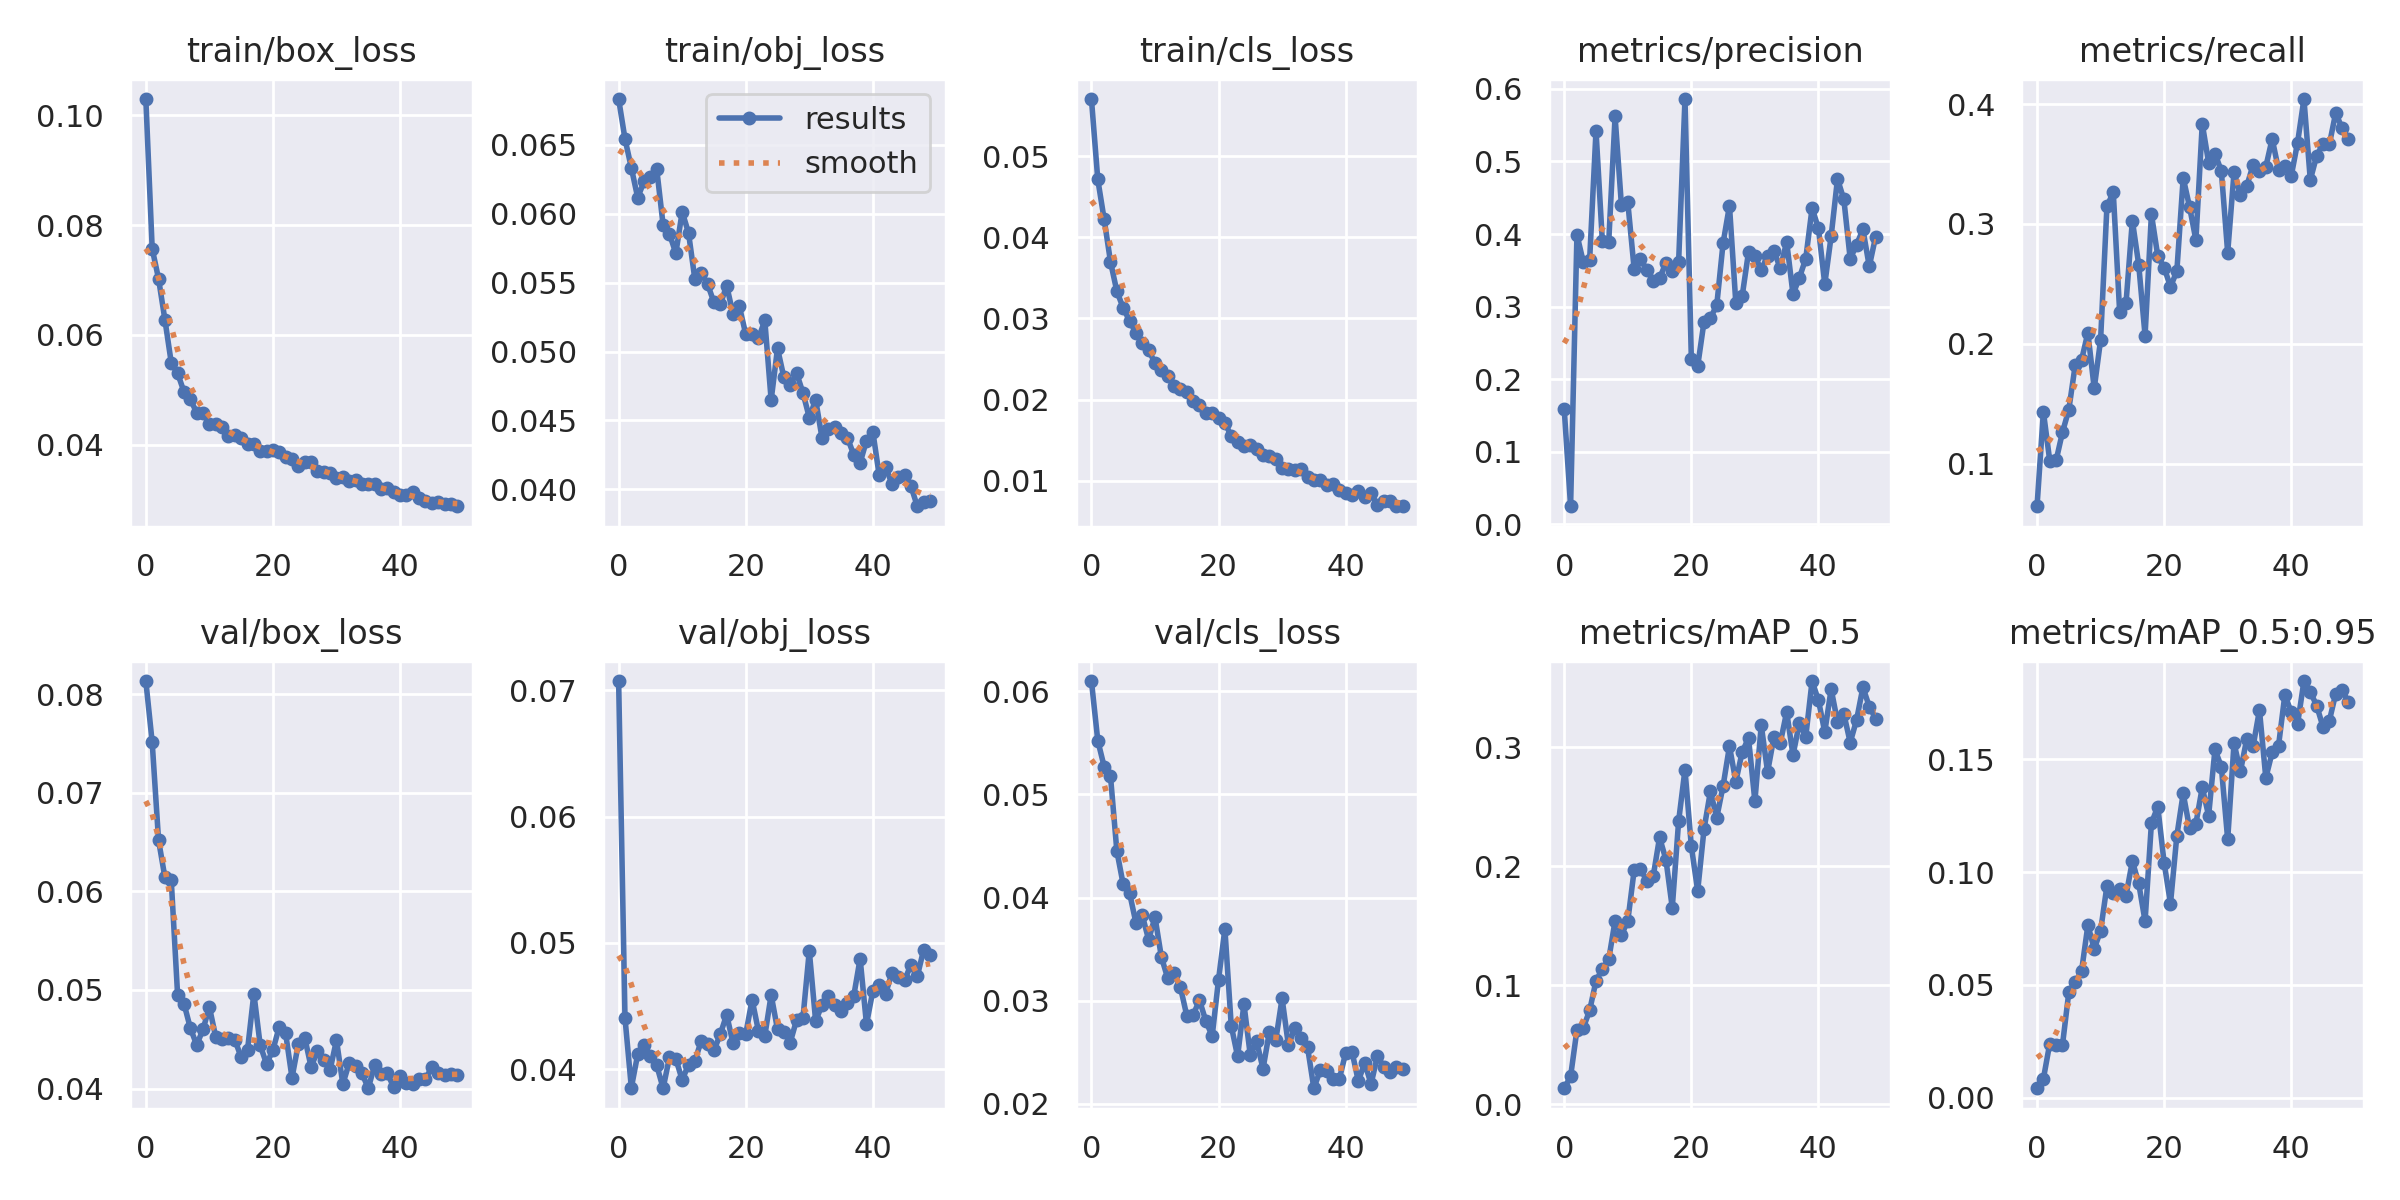

In [14]:
from utils.plots import plot_results # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5m_results/results.png', width=1000) # view results.png

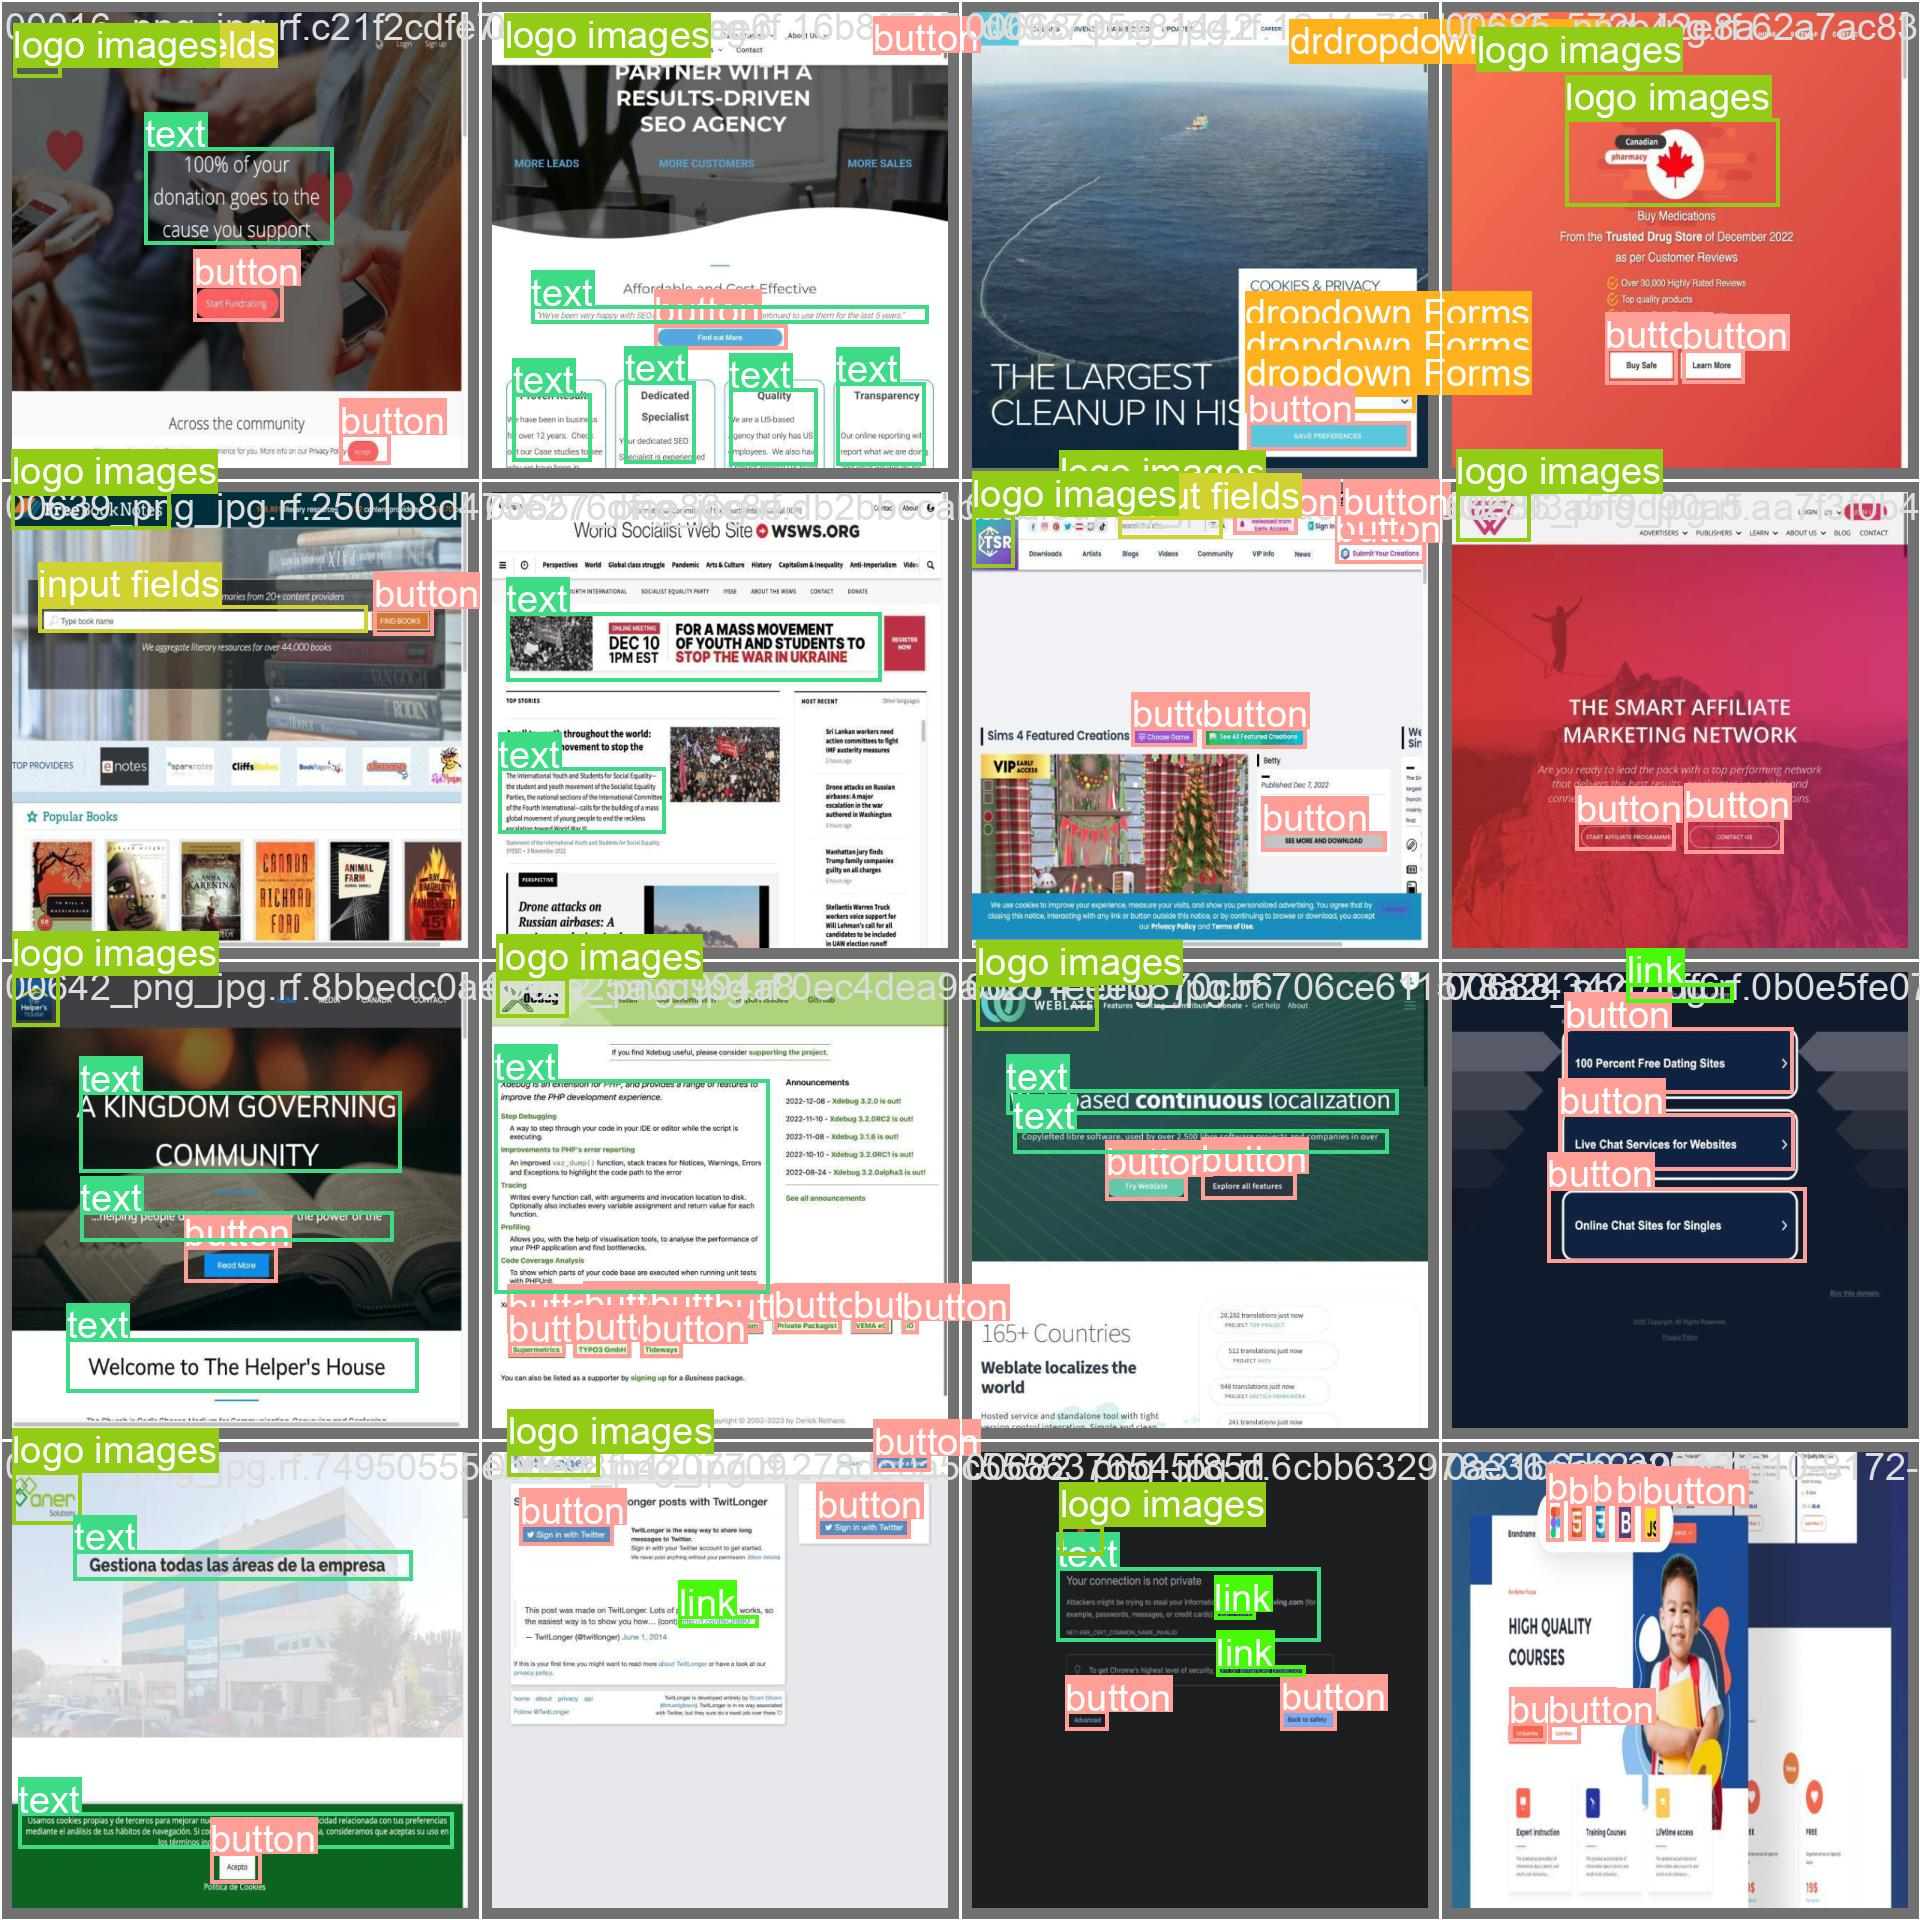

In [15]:
Image(filename = '/content/yolov5/runs/train/yolov5m_results/val_batch0_labels.jpg', width=900)

In [16]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5m_results/weights/best.pt --img 416 --conf 0.25 --source /content/yolov5/banao-1/valid/images

/content/yolov5
detect: weights=['runs/train/yolov5m_results/weights/best.pt'], source=/content/yolov5/banao-1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/70 /content/yolov5/banao-1/valid/images/00016_png_jpg.rf.c21f2cdfe7ebb0002992ee66790c42a8.jpg: 416x416 2 buttons, 1 input fields, 1 text, 15.8ms
image 2/70 /content/yolov5/banao-1/valid/images/00034_png_jpg.rf.1e41b4cc17ed61

In [17]:

from google.colab import files
files.download('/content/yolov5/runs/train/yolov5m_results/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

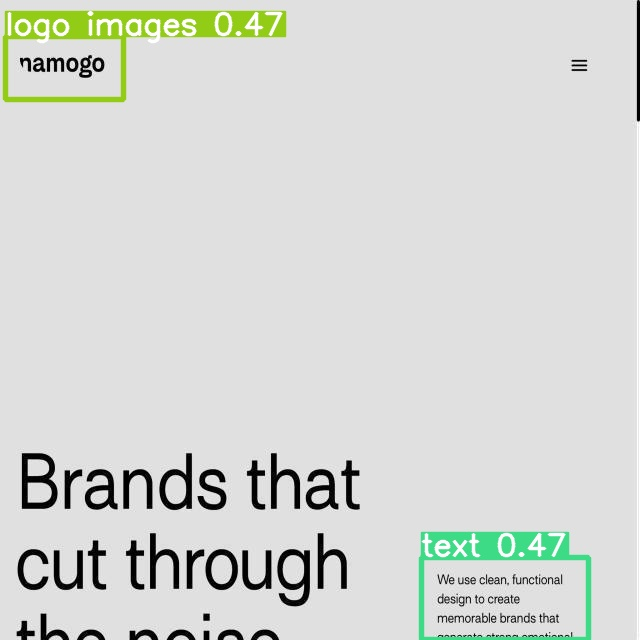

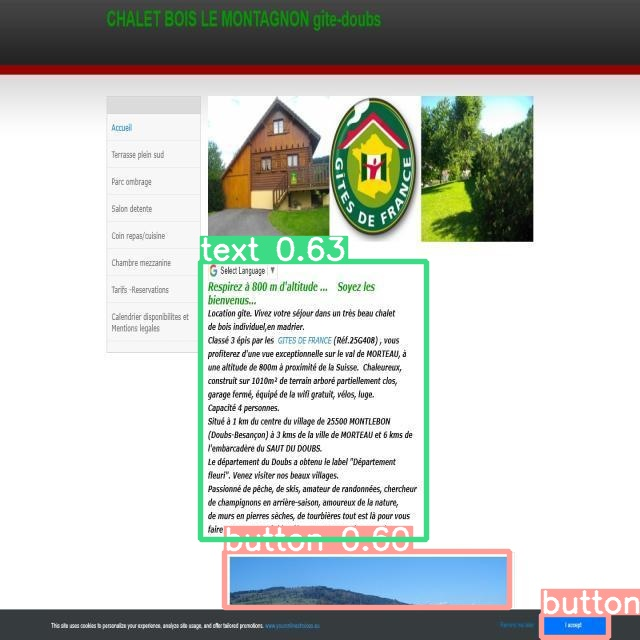

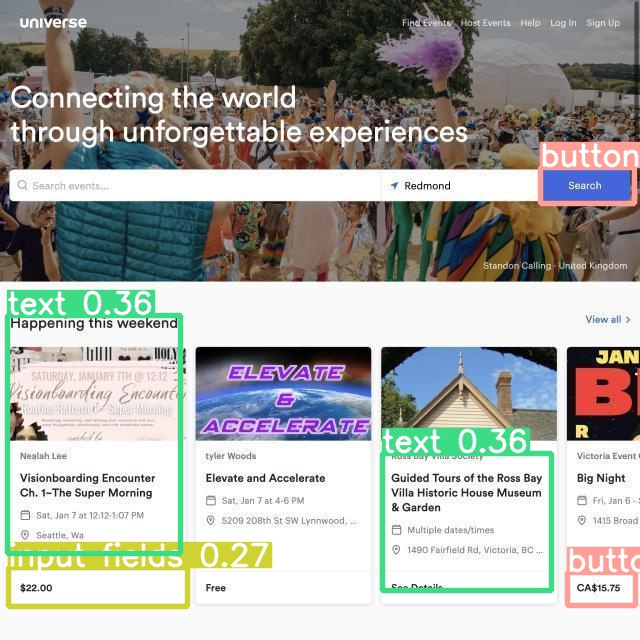

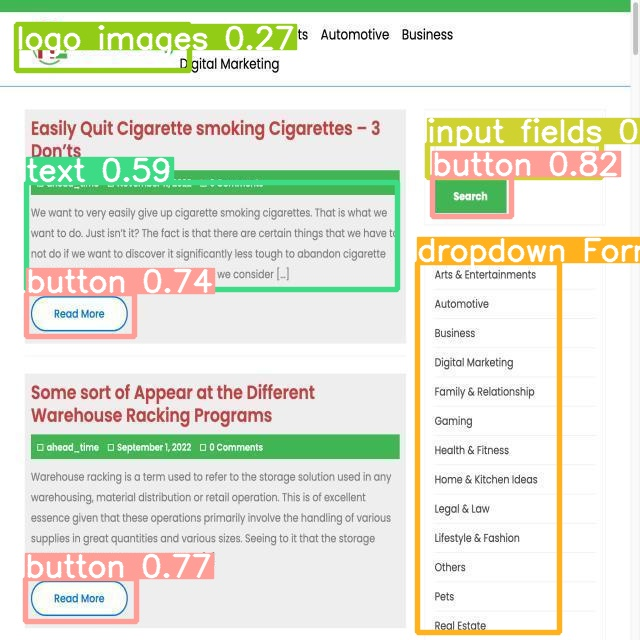

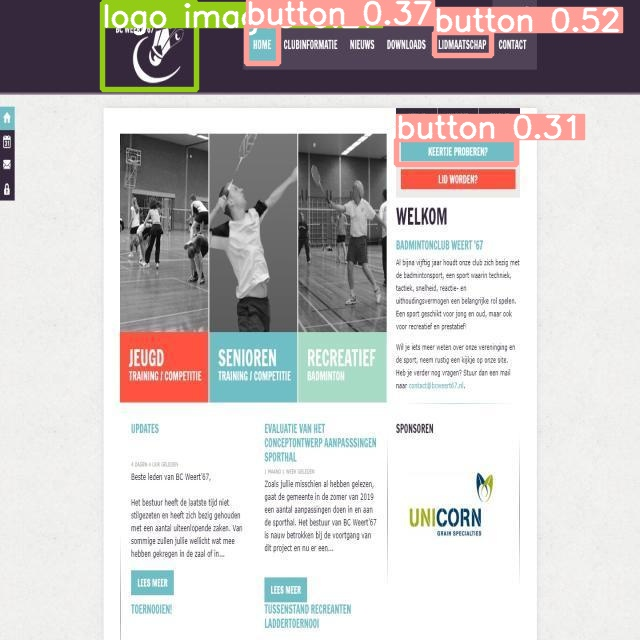

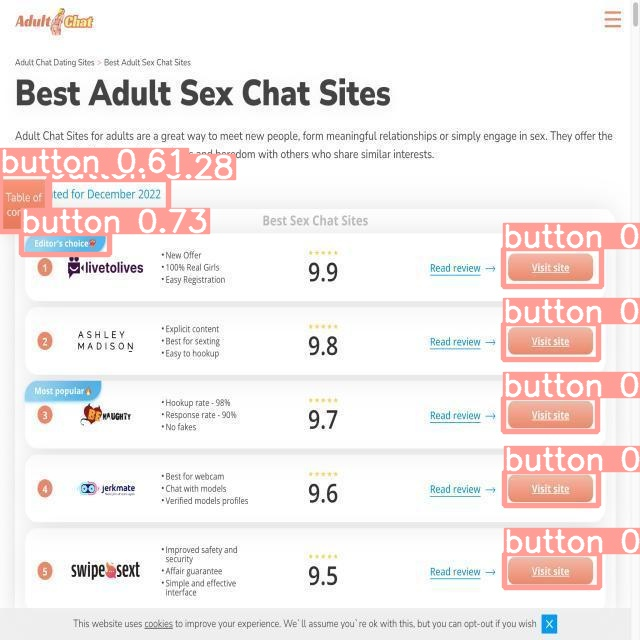

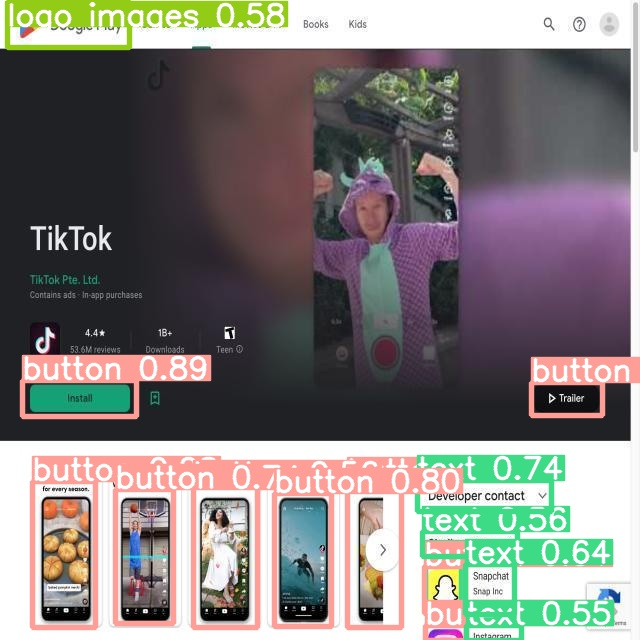

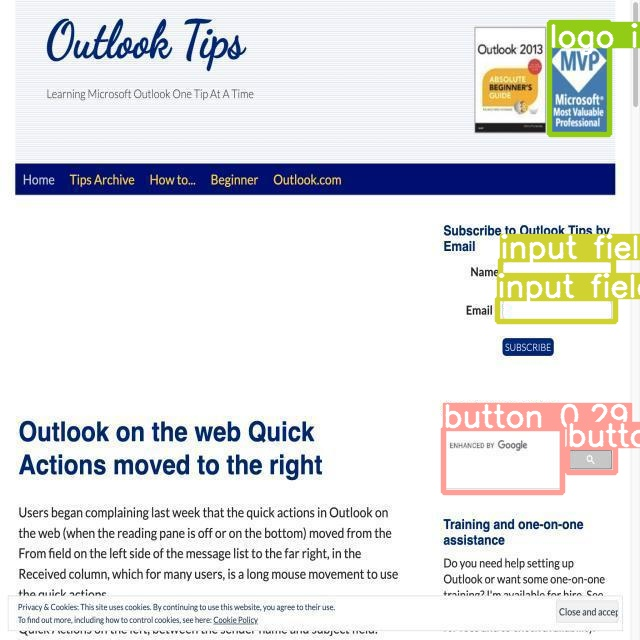

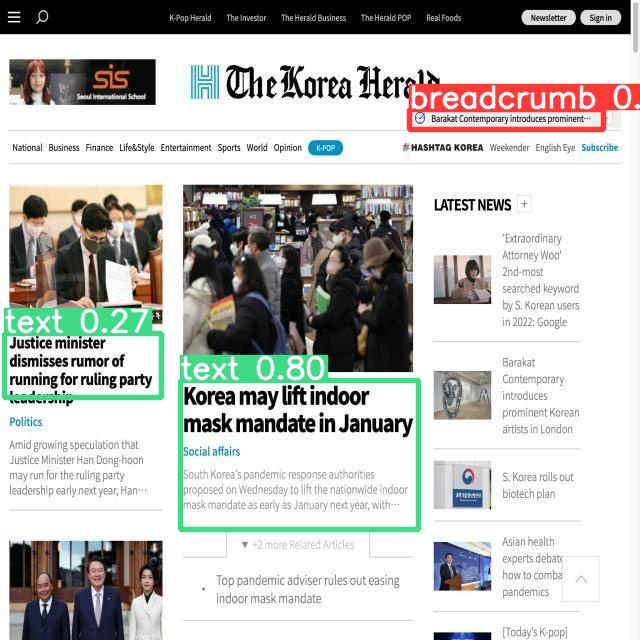

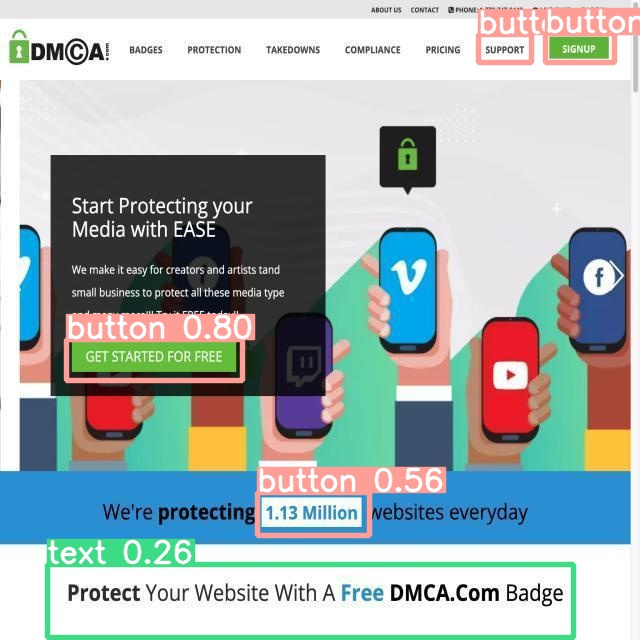

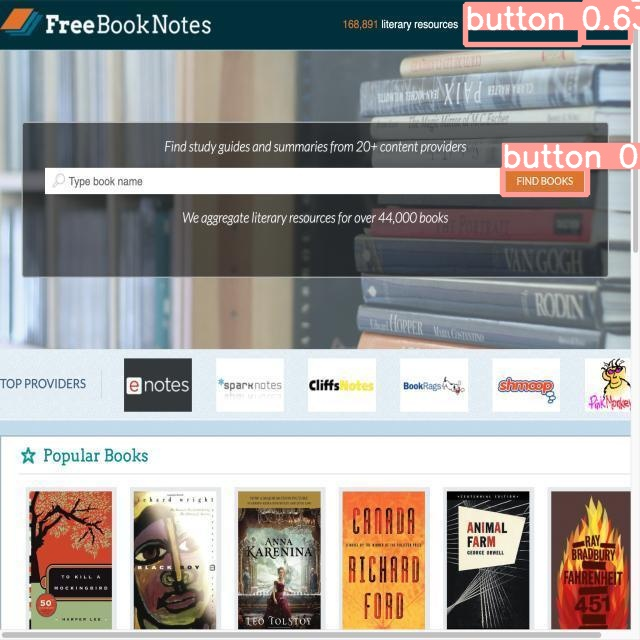

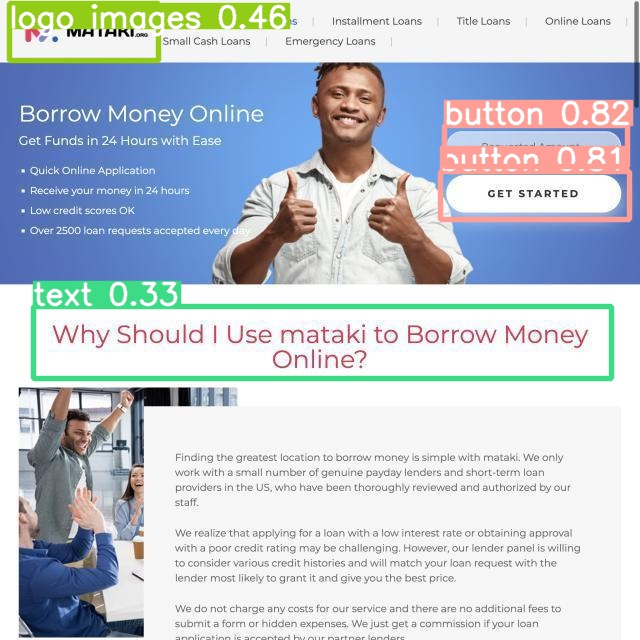

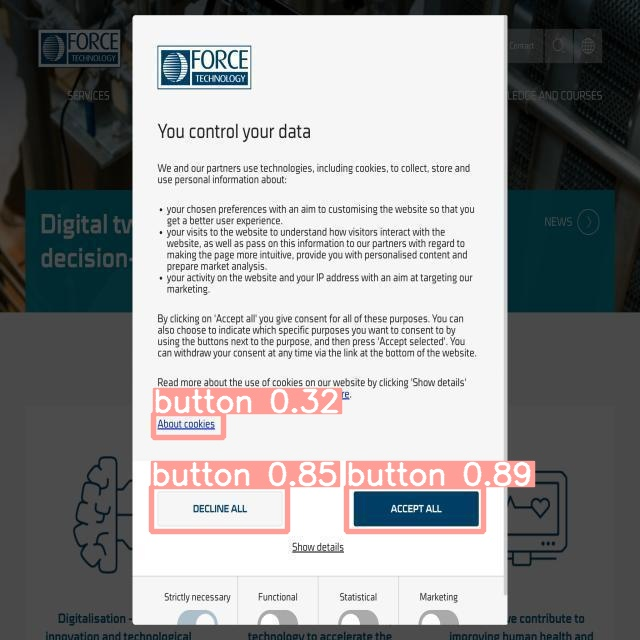

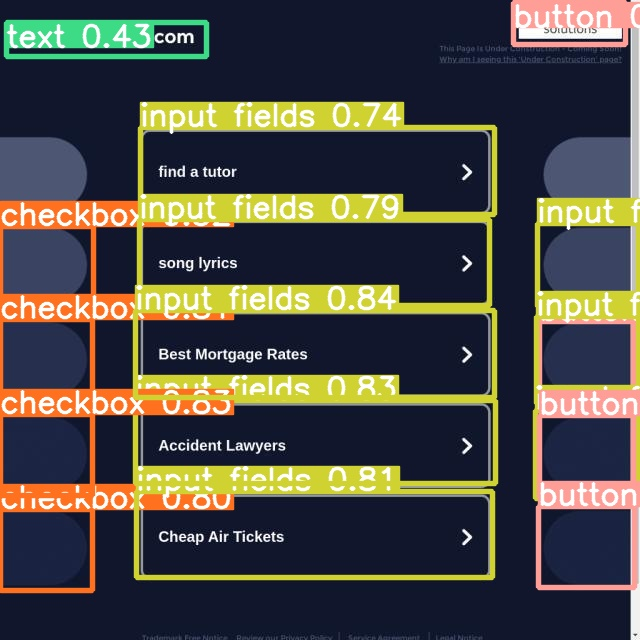

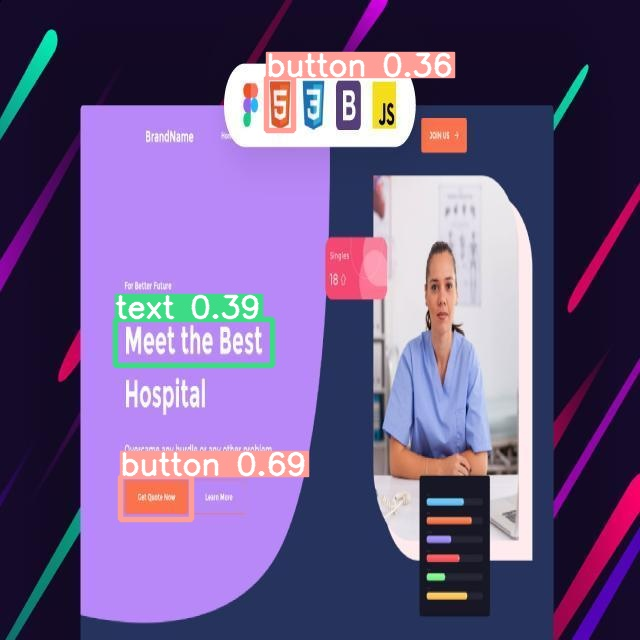

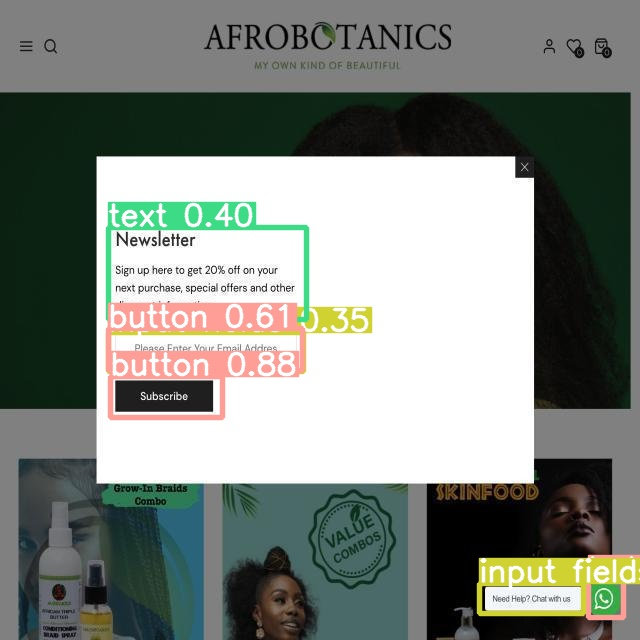

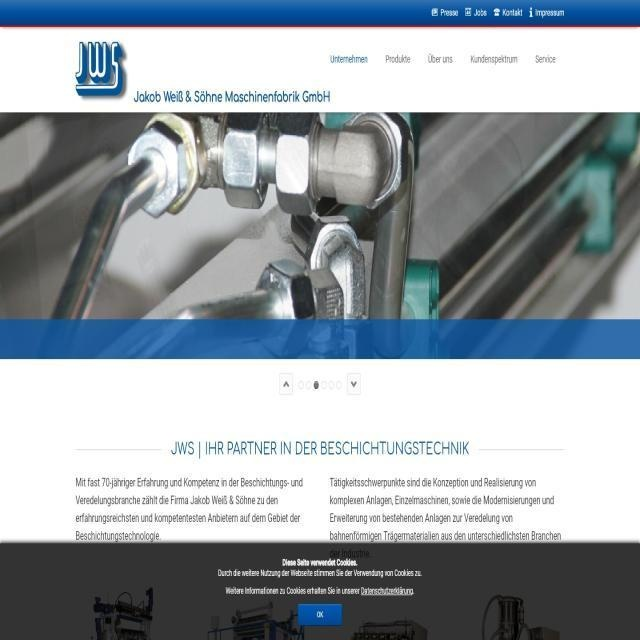

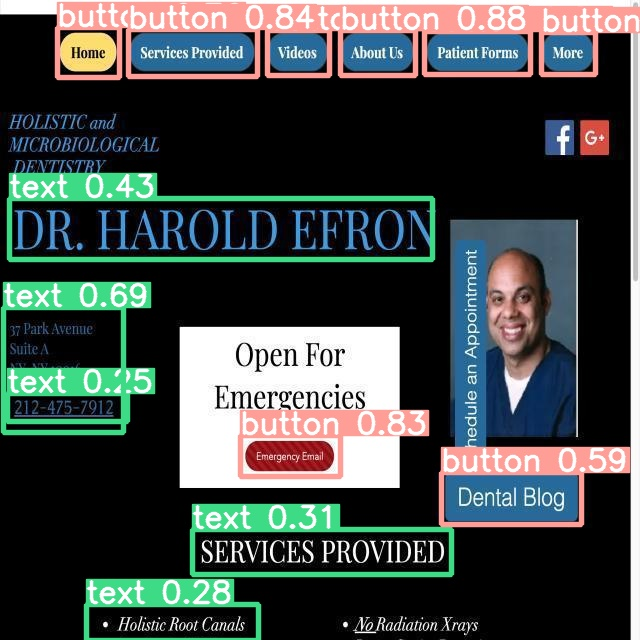

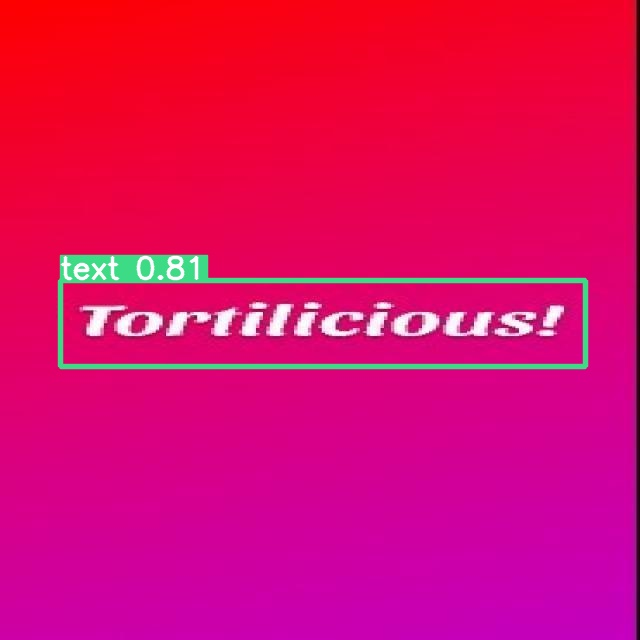

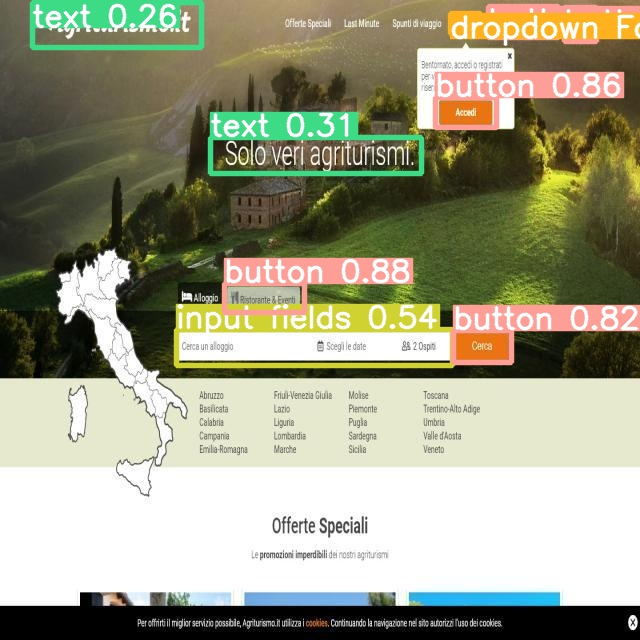

In [18]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:20]:
  display(Image(filename=imageName))